In [11]:
import numpy as np
from matplotlib import pyplot as pltt
from importlib import reload
pltt=reload(pltt)
%matplotlib inline
pltt.style.use('seaborn-white')

In [6]:
class Perceptron:
    def __init__(self, N, alpha=0.1):
        
        #initialise the weight matrix and learning rate
        self.W = np.random.randn(N+1)/np.sqrt(N)
        self.alpha = alpha
        
    def step(self, x):
        
        #apply the step function
        return 1 if x>0 else 0
    
    def fit(self, X, y, epochs=10):
        
        # insert a column of 1's as the last entry in the feature
		# matrix -- this little trick allows us to treat the bias
		# as a trainable parameter within the weight matrix
        X = np.c_[X, np.ones((X.shape[0]))]
        
        # loop over the desired number of epochs
        for epoch in range(0, epochs):
            for (x, target) in zip(X, y):
                # take the dot product between the input features
				# and the weight matrix, then pass this value
				# through the step function to obtain the prediction
                p = self.step(np.dot(x, self.W))
                
                
                pltt.plot(target[0],p,marker='o', label=x)
                pltt.ylabel='pred'
                pltt.legend(loc='best')
                pltt.show()
                
                # only perform a weight update if our prediction
				# does not match the target
                if(p != target[0]):
                    # determine the error
                    error = target - p
                    
                    # update the weight matrix
                    self.W += self.alpha*error*x
        print(self.W)
        
    def predict(self, X, addBias=True):
        # ensure our input is a matrix
        X = np.atleast_2d(X)
        
        # check to see if the bias column should be added
        if addBias:
            # insert a column of 1's as the last entry in the feature
			# matrix (bias)
            X = np.c_[X, np.ones(X.shape[0])]
            
        # take the dot product between the input features and the
        # weight matrix, then pass the value through the step
        # function
            p = self.step(np.dot(X, self.W))
            pltt.plot(target[0],p,marker='o', label=X)
            pltt.xlabel("ground_truth")
            pltt.ylabel("pred")
            pltt.legend(loc='best')
            pltt.tight_layout()
            pltt.show()
        return p 

[INFO] training perceptron...


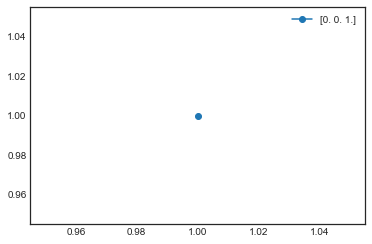

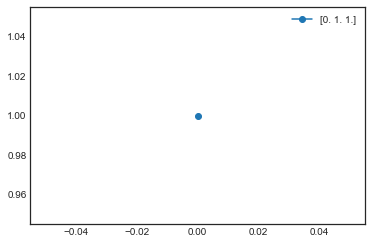

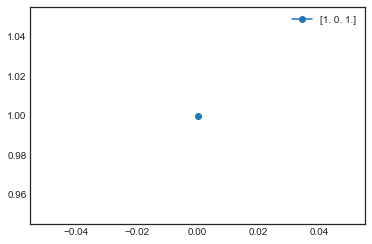

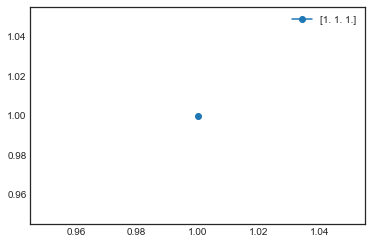

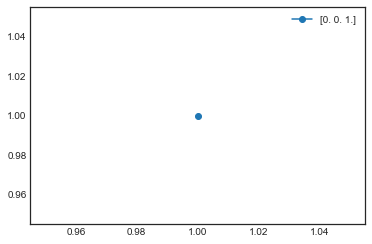

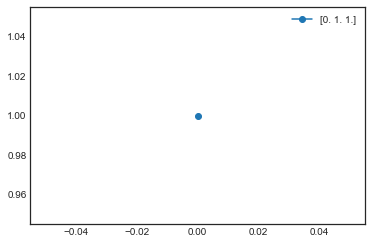

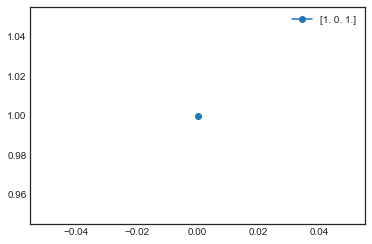

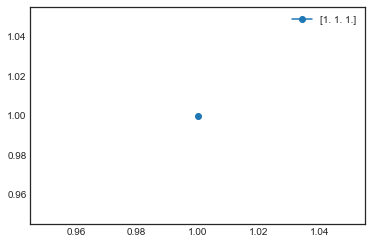

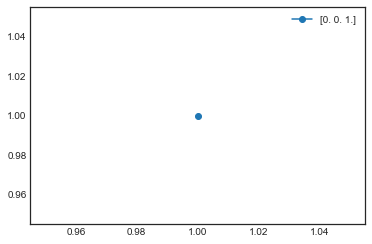

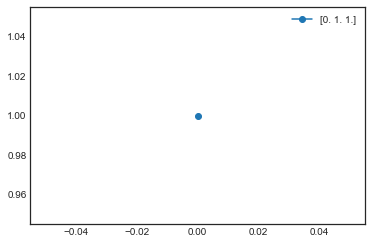

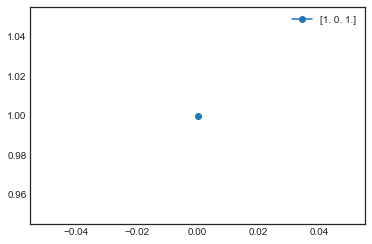

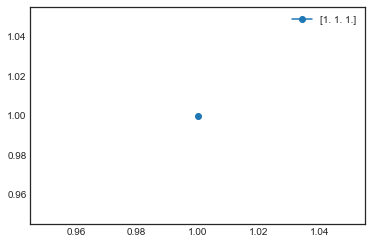

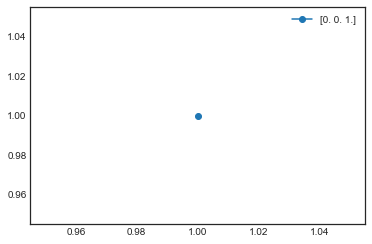

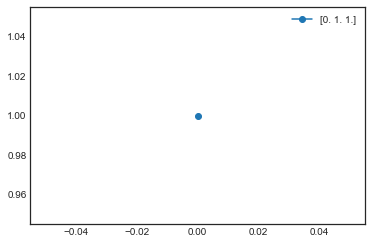

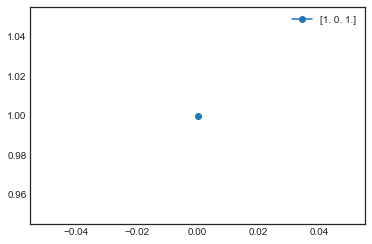

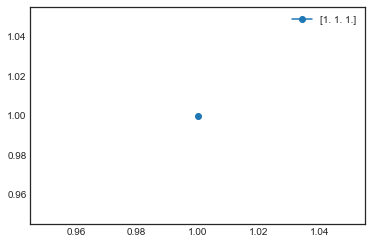

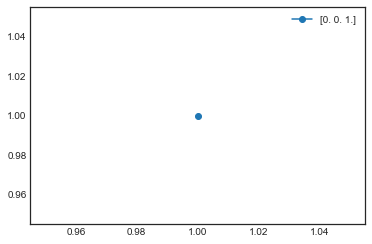

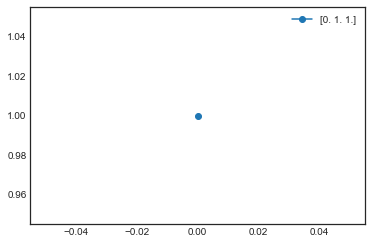

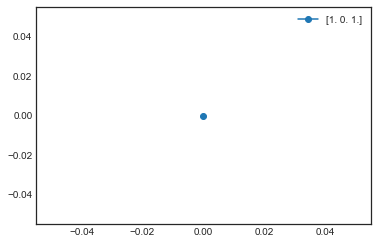

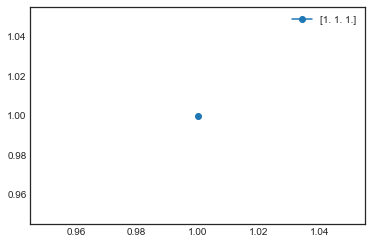

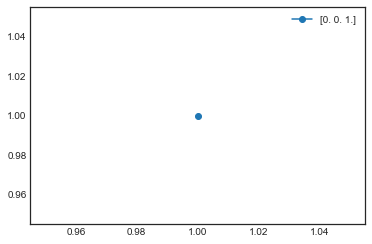

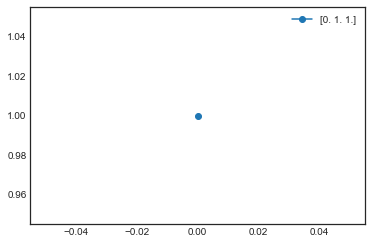

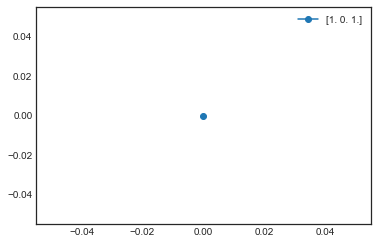

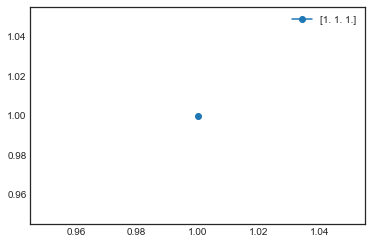

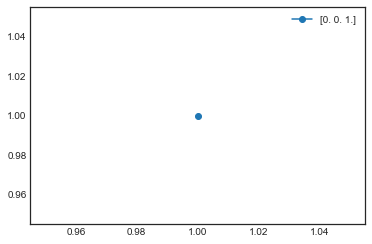

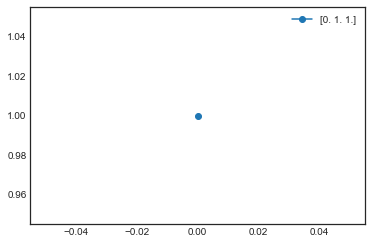

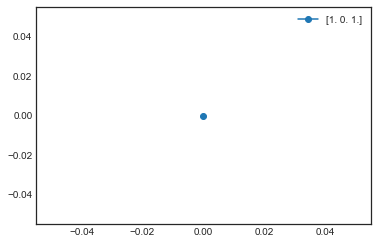

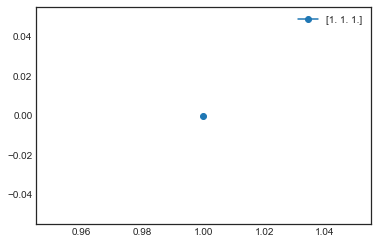

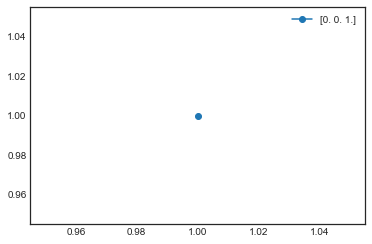

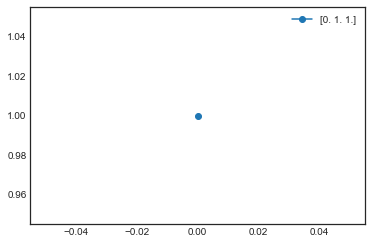

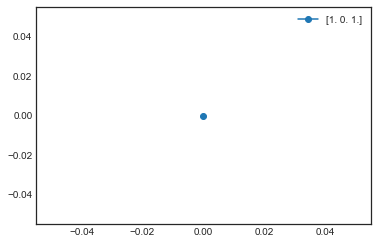

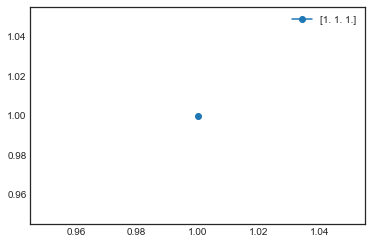

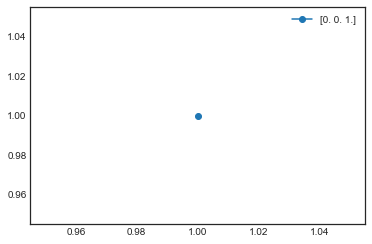

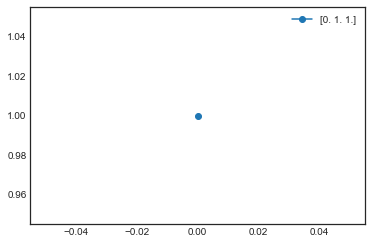

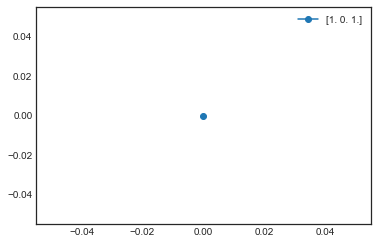

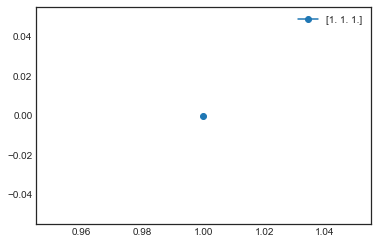

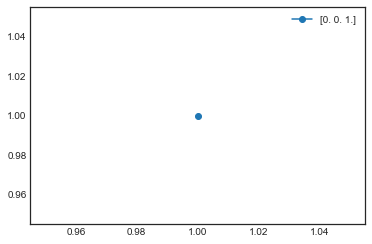

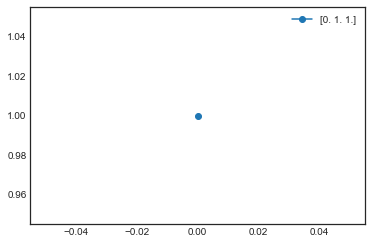

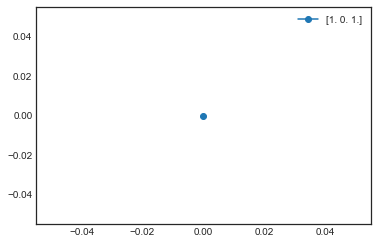

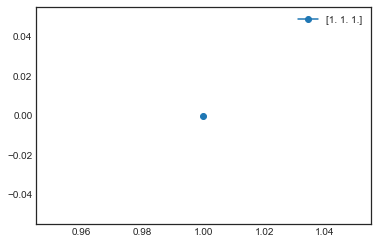

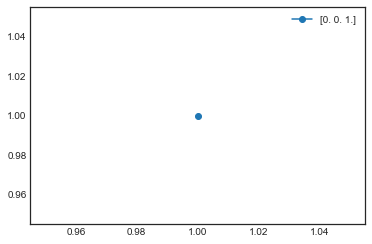

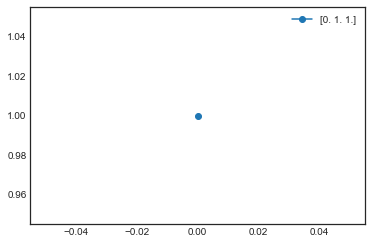

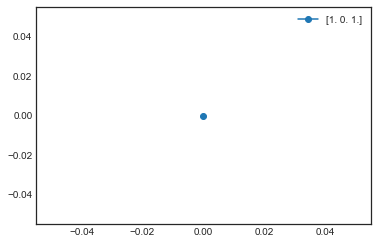

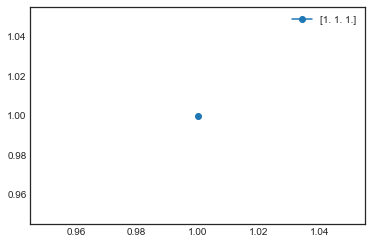

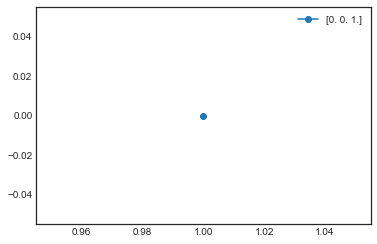

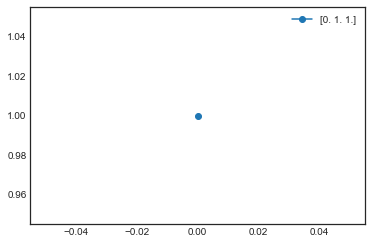

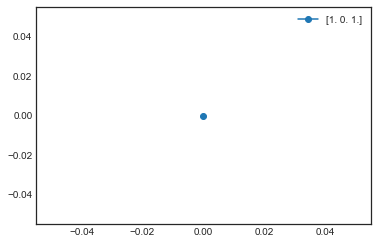

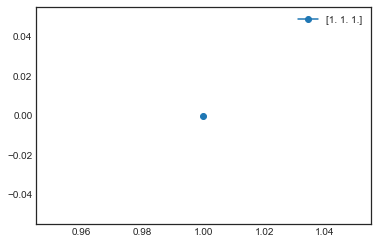

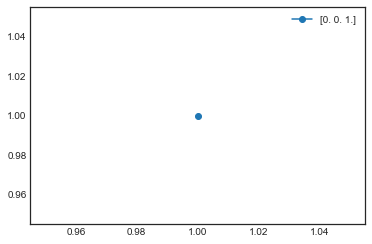

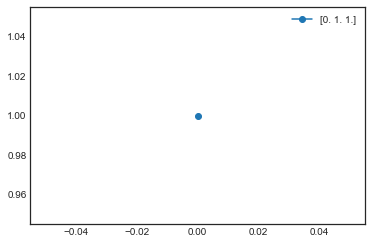

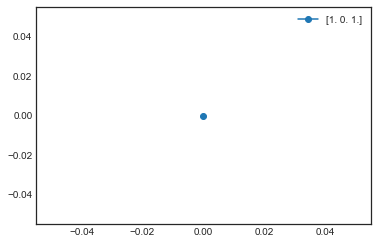

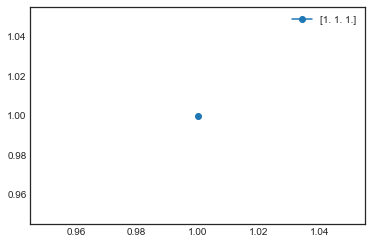

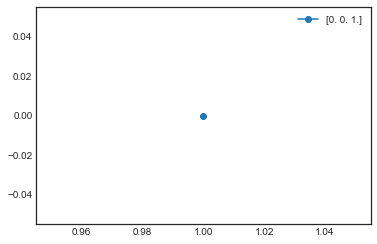

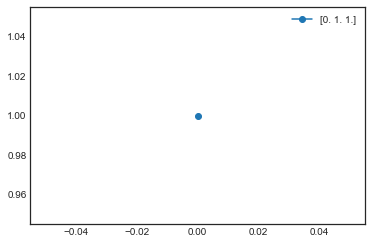

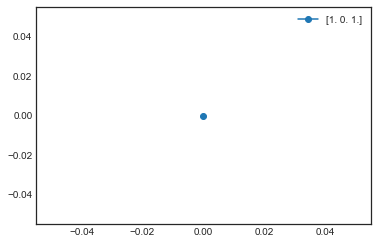

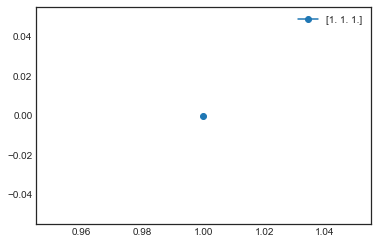

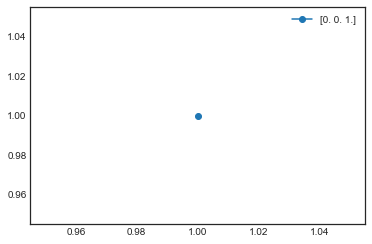

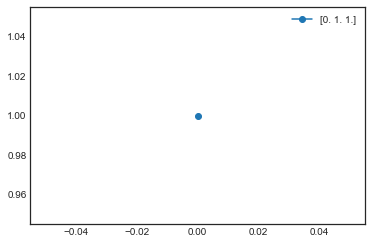

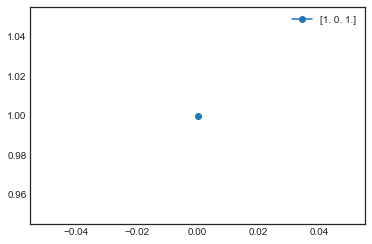

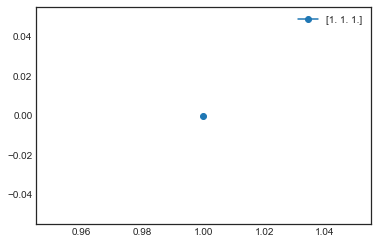

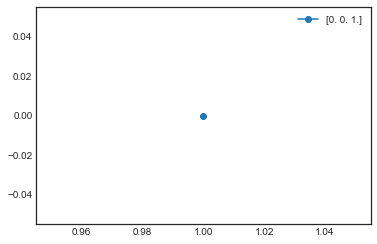

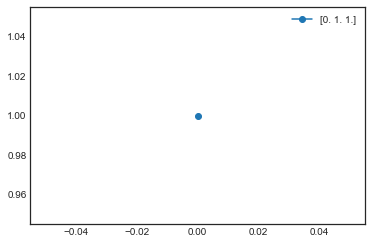

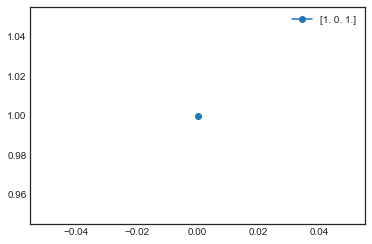

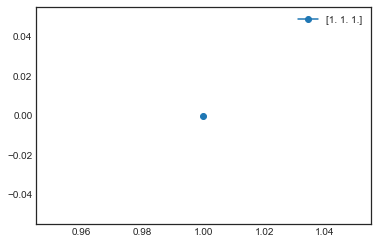

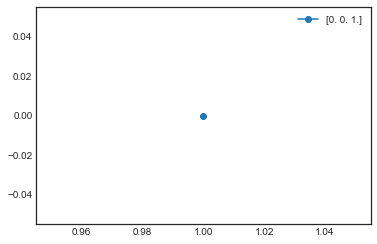

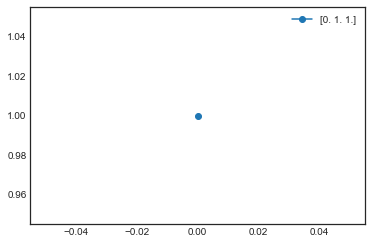

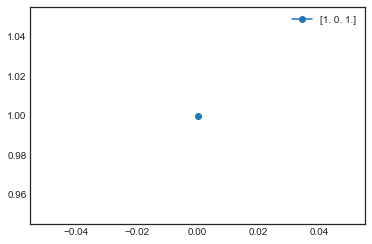

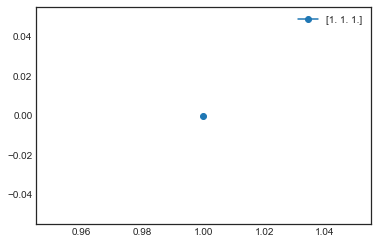

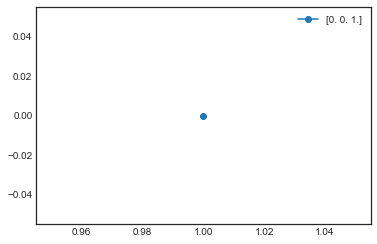

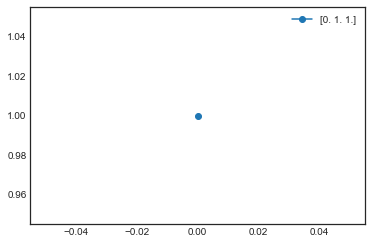

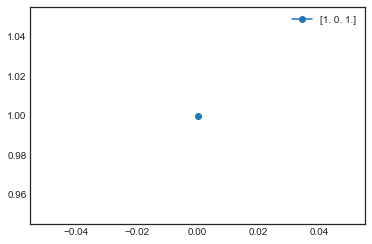

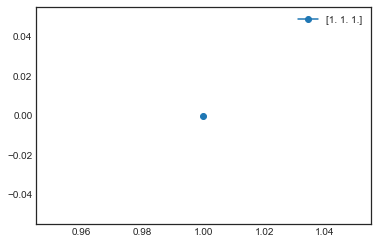

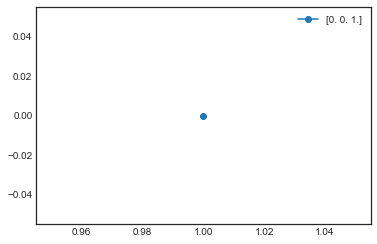

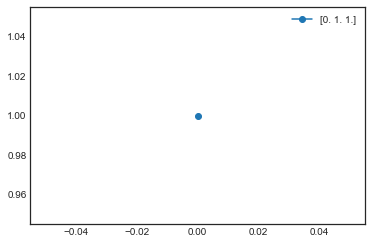

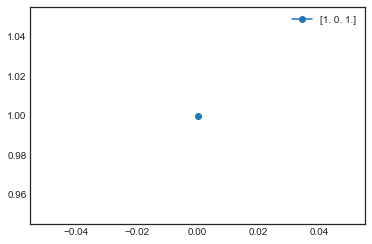

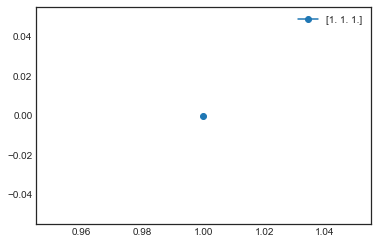

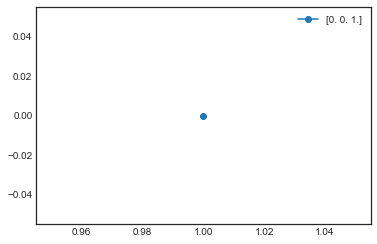

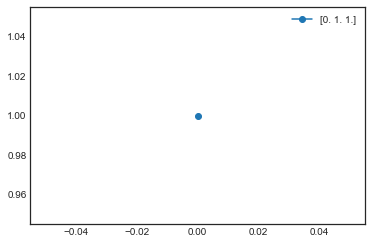

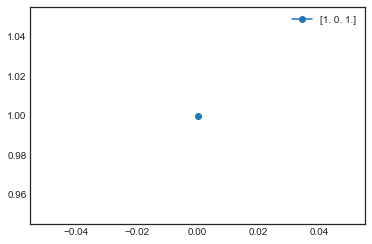

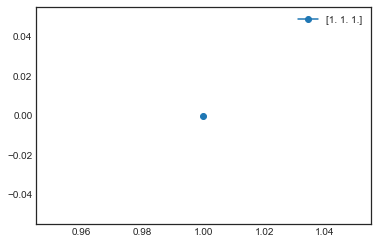

[ 0.10792574  0.11517914 -0.06004392]


In [7]:
# construct the OR dataset
X = np.array([[0,0], [0,1], [1,0], [1,1]])
y = np.array([[1], [0], [0], [1]])

# define our perceptron and train it
print("[INFO] training perceptron...")
model = Perceptron(X.shape[1])
model.fit(X, y, epochs=20)

[INFO] testing perceptron...


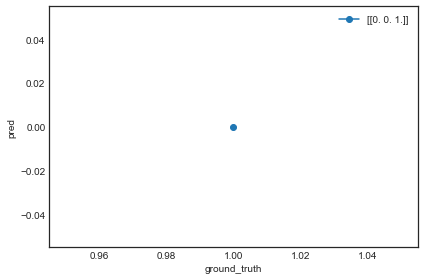

[INFO] data=[0 0], ground-truth=[1], pred=0


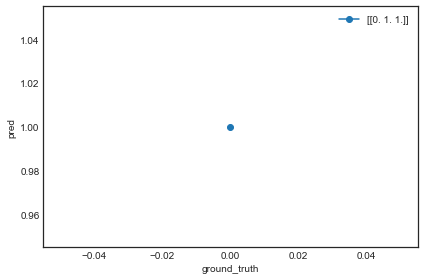

[INFO] data=[0 1], ground-truth=[0], pred=1


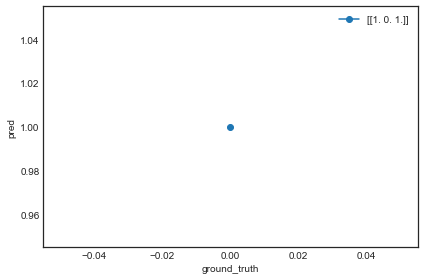

[INFO] data=[1 0], ground-truth=[0], pred=1


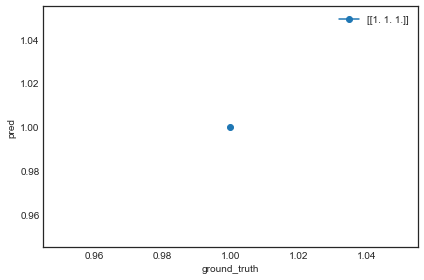

[INFO] data=[1 1], ground-truth=[1], pred=1


In [12]:
# now that our perceptron is trained we can evaluate it
print("[INFO] testing perceptron...")

# now that our network is trained, loop over the data points
for (x, target) in zip(X, y):
    # make a prediction on the data point and display the result
	# to our console
	pred = model.predict(x)
	print("[INFO] data={}, ground-truth={}, pred={}".format(x, target, pred))